
<img align="left"  src= "http://aaun.edu.au/wp-content/uploads/2016/02/Department_of_Education_and_Training_Australia_logo.jpg" width="300">


<img align="right"  src= "https://www.courseseeker.edu.au/assets/images/institutions/4450.png" width="220">

### 1. Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data here here. The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- `Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?`


- `Are younger employees resigning due to some kind of dissatisfaction?`


- `What about older employees?`

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- `ID`: An id used to identify the participant of the survey


- `SeparationType`: The reason why the person's employment ended


- `Cease Date`: The year or month the person's employment ended


- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- `Record ID`: An id used to identify the participant of the survey


- `Reason for ceasing employment`: The reason why the person's employment ended


- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)


In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
def missing_on_columns(df):
    df_nulls = df.isnull().sum()
    len_df_nulls = len(df_nulls)

    zero_NaN=0
    cnt=0
    
    for pos_column in range(len_df_nulls):
        if df_nulls[pos_column] > zero_NaN:
            cnt+=1
            print(df_nulls.index[pos_column], "\n")
            print(df[df_nulls.index[pos_column]].value_counts(dropna = False), "\n")
    print(f"# columns with missing values: {cnt} of: {len_df_nulls} ","\n" )

`def missing_on_columns(df)` It show us all columns that have `NaN` values and their content.

### dete_survey

In [4]:
dete_survey.info() # Department of Education, Training and Employment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Use other **data exploration methods** such as the `Series.value_counts()` and `DataFrame.isnull()` methods to explore the data and figure out some next steps.

from `dete_survey.isnull().sum()` we can see which columns are those that have null values. 

Therefore we call the `missing_on_columns()` function.

In [7]:
missing_on_columns(dete_survey) #columns with almost 1 missing value 

Position 

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
NaN                                                          5
Business Service Manager                                     4
Deputy Principal                            

### tafe_survey

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [11]:
missing_on_columns(tafe_survey)

CESSATION YEAR 

2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: CESSATION YEAR, dtype: int64 

Reason for ceasing employment 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64 

Contributing Factors. Career Move - Public Sector  

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64 

Contributing Factors. Career Move - Private Sector  

-                               336
NaN                             265
Career Move - Private Sector    101
Name: Contributing Factors. Career Move - Private Sector , dtype: int64 

Contributing Factors. Career Move - Self-employment 

-                                


# columns with missing values: 69 of: 72  



### Observations:

`dete_survey` dataframe contains `'Not Stated'` values that indicate **values are missing, but they aren't represented as `NaN`**.

**Both** the `dete_survey` and `tafe_survey` dataframes contain **many columns that we don't need to complete our analysis**.

Each dataframe contains many of the **same columns, but the column names are different**.

**There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.**

### 2. Identify Missing Values and Drop Unnecessary Columns

- To start, we'll handle values that should be represented as `NaN`. We'll use `pd.read_csv()` function to fix the missing values first. 

- Then, we'll drop columns we know we don't need for our analysis.

In [12]:
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated'  ) # preguntar esto del "not stated"
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

As a result of having entered in the `na_values=` parameter `not stated`, more `NaN` values appear! 

The columns to be drop will be these: 

In [13]:
dete_survey.columns[28:49] # Columns to drop in dete_survey

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [14]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis =1)

In [15]:
tafe_survey.columns[17:66] # Columns to drop in tafe_survey

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [16]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis =1)

### 3. Clean Column Names

#### Beacuse we eventually want to combine the df, we'll have to standardize the column names

- Rename the remaining columns in the `dete_survey_updated` dataframe.

- Use the following criteria to update the column names:

    - Make all the capitalization lowercase.

    - Remove any trailing whitespace from the end of the strings.

    - Replace spaces with underscores ('_').

In [17]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.rstrip()

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Update the columns in `tafe_survey_updated` with `.rename` method.

In [18]:
tafe_survey_updated.rename({'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                          axis=1, inplace=True)

In [19]:
# explica por que has hecho los cambios. Because we eventually want to combine them, we'll have to standardize the column names

### 4. Filter the Data

Recall that our end goal is to answer the following question:

 Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 

- `Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?`


- `Are younger employees resigning due to some kind of dissatisfaction?`


- `What about older employees?`


If we look at the **unique values** in the `separationtype` columns in **each dataframe**, we'll see that each contains a couple of different separation types. 

In [20]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [21]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

For this project, **we'll only analyze survey respondents who resigned**, so their separation type contains the string `'Resignation'`.

Review the **unique values** in the **separationtype** column in both `dete_survey_updated` and `tafe_survey_updated`.

In [22]:
dete_survey_updated['separationtype'].value_counts(dropna=False).copy()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [23]:
tafe_survey_updated['separationtype'].value_counts(dropna=False).copy()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

### In each of dataframes, select only the data for survey respondents who have a Resignation separation type.

In [24]:
dete_resignations=dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons') |
                                      (dete_survey_updated['separationtype']=='Resignation-Other employer') |
                                      (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy()

dete_resignations['separationtype'].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [25]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

### Write a markdown paragraph explaining the changes you made and why.

### 5. Verify the Data 

let's verify that the data doesn't contain any major inconsistencies.

In this step, we'll focus on verifying that the **years** in the `cease_date `and `dete_start_date` columns make sense. 

However, we encourage you to check the data for other issues as well!


- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.


- Given that most people in this field start working in their 20s, it's also **unlikely that the `dete_start_date` was before the year 1940**.


- If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. 

- If there are a small amount of values that are unrealistically high or low, we can remove them.




In [26]:
import seaborn as sns

### dete_resignations

<AxesSubplot:ylabel='position'>

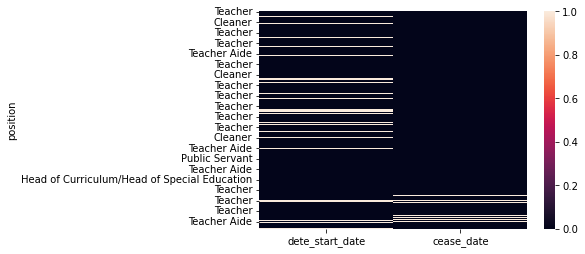

In [27]:
combined_cease_date = dete_resignations.set_index('position')
sns.heatmap(combined_cease_date[['dete_start_date','cease_date']].isnull(), cbar=True)

In [28]:
#pd.notna(dete_resignations['cease_date'])

In [29]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype('float').copy()

In [30]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

In [31]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64

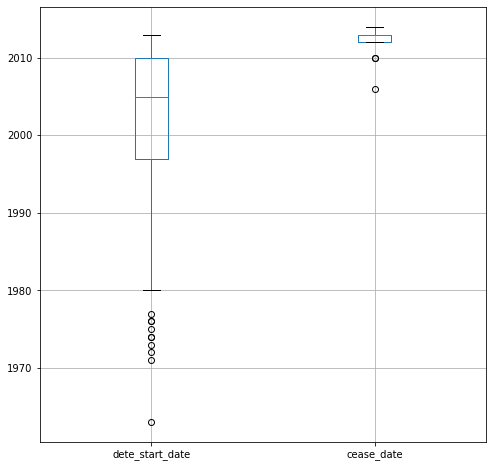

In [32]:
boxplot = dete_resignations.boxplot(column=['dete_start_date','cease_date'], figsize=(8,8))

In [33]:
dete_resignations['cease_date'].isnull().value_counts()

False    300
True      11
Name: cease_date, dtype: int64

### tafe_resignations

<AxesSubplot:ylabel='position'>

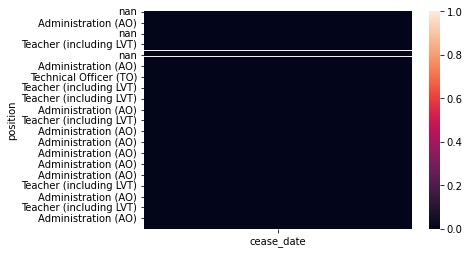

In [34]:
combined_tafe_date = tafe_resignations.set_index('position')
sns.heatmap(combined_tafe_date[['cease_date']].isnull(), cbar=True)

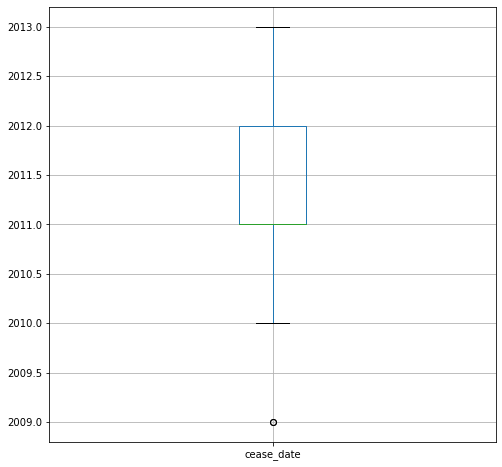

In [35]:
boxplot = tafe_resignations.boxplot(column=['cease_date'], figsize=(8,8))

In [36]:
tafe_resignations['cease_date'].isnull().value_counts()

False    335
True       5
Name: cease_date, dtype: int64

## 6. Create a New Column

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column.

You may have noticed that the `tafe_resignations` df **already contains** a **"service"** column, which we renamed to **institute_service**. In order to analyze both surveys together.

we'll have to create a corresponding **institute_service** column in `dete_resignations`.



In [37]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
#dete_resignations

In [38]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0


### 7. Identify Dissatisfied Employees

- We'll use to categorize employees as "dissatisfied" from each dataframe.

`tafe_survey_updated`:
- Contributing Factors. Dissatisfaction

- Contributing Factors. Job Dissatisfaction

`dete_survey_updated`:
- job_dissatisfaction

- dissatisfaction_with_the_department

- physical_work_environment

- lack_of_recognition

- lack_of_job_security

- work_location

- employment_conditions

- work_life_balance

- workload

If the employee indicated **any** of the factors above caused them to resign, we'll mark them as **dissatisfied** in a new column.

In [39]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

In [40]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

In [41]:
def update_vals(element):
    if pd.isnull(element):        
        return np.nan
    elif element=='-':
        return False
    else:
        return True

### tafe_resignations_up

In [42]:
columns = ['Contributing Factors. Dissatisfaction',
           'Contributing Factors. Job Dissatisfaction']

tafe_resignations['dissatisfied'] = tafe_resignations[columns].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
tafe_resignations_up[['dissatisfied']]

,dissatisfied
3,False
4,False
5,False
6,False
7,False
8,False
9,False
10,False
13,False
14,True


### dete_resignations_up

In [44]:
columnas = ['job_dissatisfaction',
            'dissatisfaction_with_the_department',
            'physical_work_environment',
            'lack_of_recognition',
            'lack_of_job_security',
            'work_location',
            'employment_conditions',
            'work_life_balance',
            'workload']

dete_resignations['dissatisfied'] = dete_resignations[columnas].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [45]:
dete_resignations_up[['dissatisfied']]

,dissatisfied
3,False
5,True
8,False
9,True
11,False
12,False
14,True
16,True
20,False
21,False


### 8. Combine the Data

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

- Add a column named institute to `dete_resignations_up`. Each row should contain the value **DETE**.

- Add a column named institute to `tafe_resignations_up`. Each row should contain the value **TAFE**.

In [46]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

Combine the dataframes. Assign the result to `combined`.

In [47]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0)

Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. 

Use the `DataFrame.dropna()` method to drop **any columns with less than 500** non null values.

Remember that you can drop columns with less than a certain number of non null values with the thresh parameter.

Assign the result to `combined_updated`.

In [48]:
combined_updated = combined.dropna(axis = 1, thresh = 500).copy() # combined_updated

### 9. Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. 

This column is tricky to clean because it currently contains values in a couple different forms:

In [49]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str) # <-astype(str) imprescindible
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

To analyze the data, we'll convert these numbers into categories. 

In [50]:
r"(?P<punto0>[]*[.])"

'(?P<punto0>[]*[.])'

In [51]:
#pat = r"(?P<punto0>[.][0])|(?P<uno_a_dos>[1][-][2])|(?P<tres_a_cuatro>[3][-][4])|(?P<siete_diez>[7][-][1][0])|(?P<once_veinte>[1]{2}-[2][0])|(?P<cinco_seis>[5][-][6])|(?P<Less>Less than 1 year)|(?P<More>More than 20 years)"

# es necesario que sea str sino no se puede hacer uso de accesores correctamente

combined_updated['institute_service'] = combined_updated['institute_service'].str.replace("[.^0][1-2^0]","").str.replace("1-2","1.5").str.replace("3-4","3.5").str.replace("5-6","4.5").str.replace("7-10","8.5").str.replace("11-20","15.5").str.replace("Less than 1 year","0.5").str.replace("More than 20 years","25")

In [52]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [53]:
def mapper(val):
    if pd.isnull(val):
        return np.nan
    elif (val < 3): # Less than 3 years at a company
        return 'New'
    
    elif ((val >= 3) & (val <= 6.0)): # 3-6 years at a company
        return 'Experienced'
    
    elif ((val >= 7.0) & (val <= 10.0)): # 7-10 years at a company
        return 'Established'
    
    elif (val >= 11.0): #  11 or more years at a company
        return 'Veteran'

In [54]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(mapper)

In [55]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [58]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'service_cat'],
      dtype='object')

### 10. Perform Initial Analysis



In [ ]:
#combined_updated['dissatisfied'].value_counts(dropna=False)

In [59]:
combined_updated['dissatisfied'].fillna(method = 'ffill', inplace = True) 

In [60]:
combined_updated.pivot_table(values='dissatisfied', index = 'service_cat', aggfunc = np.mean)

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


In [61]:
pd.pivot_table(combined_updated, index='dissatisfied', margins=True)

,cease_date,id,institute_service
dissatisfied,,,
False,2011.887218,3.832403e+17,6.011461
True,2012.093220,2.438570e+17,9.280374
All,2012.003630,3.316952e+17,7.038113


In [62]:
pd.pivot_table(combined_updated, index='service_cat', margins=True)

,cease_date,dissatisfied,id,institute_service
service_cat,,,,
Established,2012.258065,0.516129,2.149465e+17,8.379032
Experienced,2011.988372,0.343023,3.542057e+17,4.127907
New,2011.766839,0.295337,4.504700e+17,0.945596
Veteran,2012.261194,0.485294,1.679548e+17,19.647059
All,2012.003630,0.381125,3.316952e+17,7.038113
